# Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle                      #used for serialization

# Importing dataset 

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)
    
#with open('./path' , mode) as rename_data:
#    var=pickle.load(renames_data)

In [3]:
X_train, y_train = train['features'], train['labels']              #train['features'] --> X_train , train['labels'] --> y_train
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

# Exploring the data 

Classes are as listed below:

( 0, b'Speed limit (20km/h)') 
( 1, b'Speed limit (30km/h)')
( 2, b'Speed limit (50km/h)') 
( 3, b'Speed limit (60km/h)')
( 4, b'Speed limit (70km/h)') 
( 5, b'Speed limit (80km/h)')
( 6, b'End of speed limit (80km/h)') 
( 7, b'Speed limit (100km/h)')
( 8, b'Speed limit (120km/h)') 
( 9, b'No passing')
(10, b'No passing for vehicles over 3.5 metric tons')
(11, b'Right-of-way at the next intersection') 
(12, b'Priority road')
(13, b'Yield') 
(14, b'Stop') 
15, b'No vehicles')
(16, b'Vehicles over 3.5 metric tons prohibited') 
(17, b'No entry')
(18, b'General caution')
(19, b'Dangerous curve to the left')
(20, b'Dangerous curve to the right') 
(21, b'Double curve')
(22, b'Bumpy road') 
(23, b'Slippery road')
(24, b'Road narrows on the right') 
(25, b'Road work')
(26, b'Traffic signals') 
(27, b'Pedestrians') 
(28, b'Children crossing')
(29, b'Bicycles crossing') 
(30, b'Beware of ice/snow')
(31, b'Wild animals crossing')
(32, b'End of all speed and passing limits') 
(33, b'Turn right ahead')
(34, b'Turn left ahead') 
(35, b'Ahead only') 
(36, b'Go straight or right')
(37, b'Go straight or left')
(38, b'Keep right') 
(39, b'Keep left')
(40, b'Roundabout mandatory') 
(41, b'End of no passing')
(42, b'End of no passing by vehicles over 3.5 metric tons')

In [10]:
#look at the images and corresponding classes

1

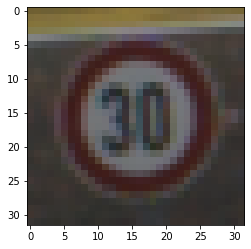

In [11]:
i = 2801
plt.imshow(X_train[i])
y_train[i]

35

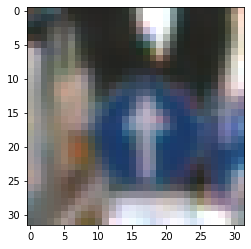

In [12]:
i = 19801
plt.imshow(X_train[i])
y_train[i]

25

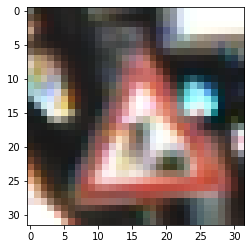

In [13]:
i = 4501
plt.imshow(X_test[i])
y_test[i]

7

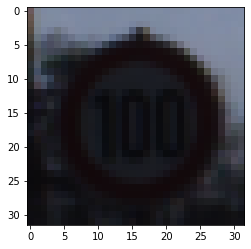

In [14]:
i = 3111
plt.imshow(X_validation[i])
y_validation[i]

# Preparing the data 

In [15]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [16]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)  #avg the rgb pixels
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)   #avg the rgb pixels
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) #avg the rgb pixels

In [17]:
X_train_gray.shape

(34799, 32, 32, 1)

In [18]:
X_test_gray.shape

(12630, 32, 32, 1)

In [19]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [20]:
X_train_gray

array([[[[147.33333333],
         [132.33333333],
         [ 76.66666667],
         ...,
         [ 60.33333333],
         [ 71.        ],
         [ 83.33333333]],

        [[115.        ],
         [ 95.        ],
         [111.33333333],
         ...,
         [114.66666667],
         [ 68.        ],
         [ 57.66666667]],

        [[ 54.66666667],
         [ 71.        ],
         [139.33333333],
         ...,
         [ 77.66666667],
         [100.33333333],
         [ 71.33333333]],

        ...,

        [[ 39.66666667],
         [ 44.        ],
         [ 40.        ],
         ...,
         [ 29.33333333],
         [ 26.33333333],
         [ 27.        ]],

        [[ 29.        ],
         [ 32.        ],
         [ 43.        ],
         ...,
         [ 28.66666667],
         [ 29.        ],
         [ 29.        ]],

        [[ 26.66666667],
         [ 28.33333333],
         [ 39.66666667],
         ...,
         [ 30.33333333],
         [ 28.        ],
         [ 29.   

In [21]:
X_train_gray_norm = (X_train_gray - 128)/128   #normalizing 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [22]:
X_train_gray_norm

array([[[[ 0.15104167],
         [ 0.03385417],
         [-0.40104167],
         ...,
         [-0.52864583],
         [-0.4453125 ],
         [-0.34895833]],

        [[-0.1015625 ],
         [-0.2578125 ],
         [-0.13020833],
         ...,
         [-0.10416667],
         [-0.46875   ],
         [-0.54947917]],

        [[-0.57291667],
         [-0.4453125 ],
         [ 0.08854167],
         ...,
         [-0.39322917],
         [-0.21614583],
         [-0.44270833]],

        ...,

        [[-0.69010417],
         [-0.65625   ],
         [-0.6875    ],
         ...,
         [-0.77083333],
         [-0.79427083],
         [-0.7890625 ]],

        [[-0.7734375 ],
         [-0.75      ],
         [-0.6640625 ],
         ...,
         [-0.77604167],
         [-0.7734375 ],
         [-0.7734375 ]],

        [[-0.79166667],
         [-0.77864583],
         [-0.69010417],
         ...,
         [-0.76302083],
         [-0.78125   ],
         [-0.7734375 ]]],


       [[[ 0.9921875 ],


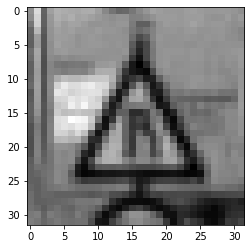

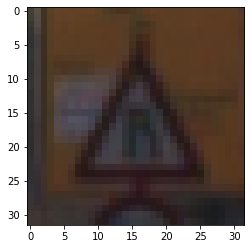

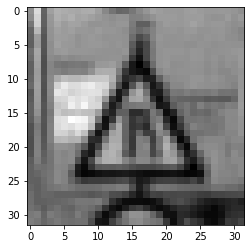

In [23]:
i = 2801
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')   #squeeze() is used to convert(32,32,1) to (32,32)
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

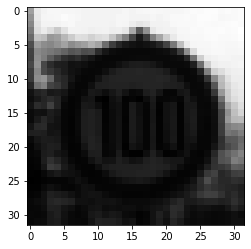

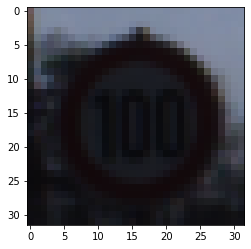

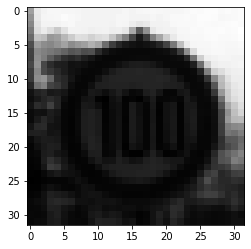

In [24]:
i = 3111
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')   #squeeze() is used to convert(32,32,1) to (32,32)
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap='gray')

# Training the model


Le-net architecture 

The model consists of the following layers:

STEP 1: THE FIRST CONVOLUTIONAL LAYER 
Input = 32x32x1
Output = 28x28x6
Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
Used a 5x5 Filter with input depth of 3 and output depth of 6
Apply a RELU Activation function to the output
pooling for input, Input = 28x28x6 and Output = 14x14x6
* Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

STEP 2: THE SECOND CONVOLUTIONAL LAYER 
Input = 14x14x6
Output = 10x10x16
Layer 2: Convolutional layer with Output = 10x10x16
Output = (Input-filter+1)/strides => 10 = 14-5+1/1
Apply a RELU Activation function to the output
Pooling with Input = 10x10x16 and Output = 5x5x16

STEP 3: FLATTENING THE NETWORK
Flatten the network with Input = 5x5x16 and Output = 400

STEP 4: FULLY CONNECTED LAYER
Layer 3: Fully Connected layer with Input = 400 and Output = 120
Apply a RELU Activation function to the output

STEP 5: ANOTHER FULLY CONNECTED LAYER
Layer 4: Fully Connected Layer with Input = 120 and Output = 84
Apply a RELU Activation function to the output

STEP 6: FULLY CONNECTED LAYER
Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [26]:
image_shape = X_train_gray[i].shape

In [27]:
cnn_model = Sequential()

#cnn
cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))    #kernel_size is the size of the filter and filters=6 means the output of the filters is 6
cnn_model.add(AveragePooling2D())   #average pooling is used for sub-sampling to reduce size

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

#ann
cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))  #output

In [28]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [29]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 11s 157ms/step - loss: 3.1148 - accuracy: 0.1858 - val_loss: 2.5534 - val_accuracy: 0.3152
Epoch 2/50
70/70 [==============================] - 10s 149ms/step - loss: 1.5337 - accuracy: 0.5644 - val_loss: 1.2031 - val_accuracy: 0.6596
Epoch 3/50
70/70 [==============================] - 10s 140ms/step - loss: 0.8595 - accuracy: 0.7556 - val_loss: 0.8787 - val_accuracy: 0.7308
Epoch 4/50
70/70 [==============================] - 10s 148ms/step - loss: 0.6287 - accuracy: 0.8265 - val_loss: 0.7076 - val_accuracy: 0.7884
Epoch 5/50
70/70 [==============================] - 10s 147ms/step - loss: 0.5100 - accuracy: 0.8602 - val_loss: 0.6460 - val_accuracy: 0.7984
Epoch 6/50
70/70 [==============================] - 10s 146ms/step - loss: 0.4264 - accuracy: 0.8865 - val_loss: 0.5738 - val_accuracy: 0.8372
Epoch 7/50
70/70 [==============================] - 10s 144ms/step - loss: 0.3642 - accuracy: 0.9038 - val_loss: 0.5555 - val_accuracy: 0.8379

# Evaluating the model

In [30]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8759


In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

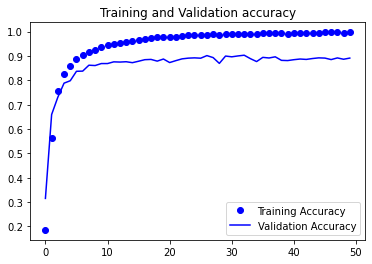

In [31]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

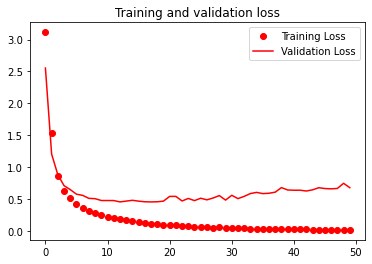

In [32]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


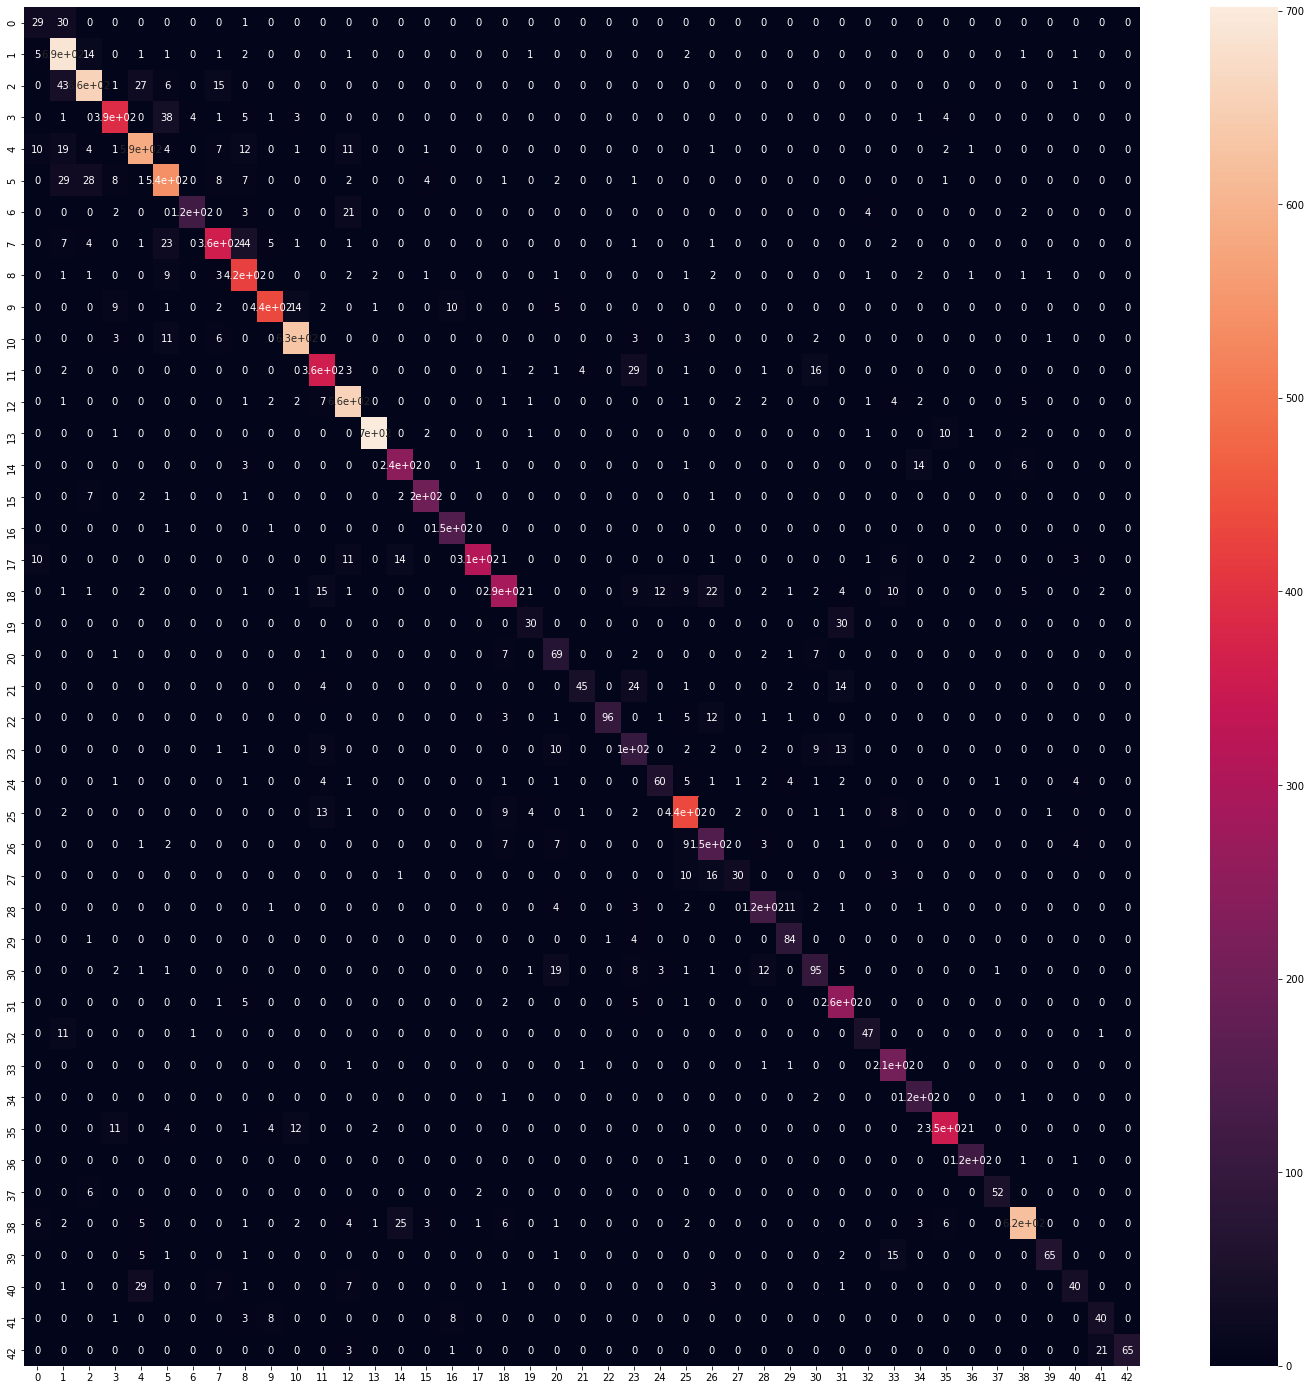

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

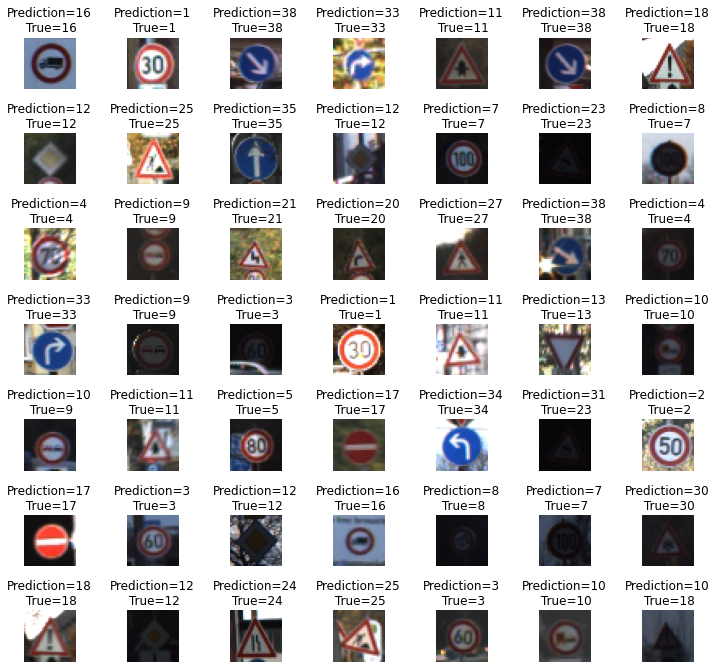

In [35]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)